# Análisis de asociaciones
---

In [1]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]

In [2]:
def metrics(x, y):
    fx_ = sum([x in i for i in my_basket]) # Frecuencia del antecedente
    fy_ = sum([y in i for i in my_basket]) # Frecuencia del consecuente
    fxy_ = sum([all(z in i for z in [x, y]) for i in my_basket]) # Frecuencia total
    soporte = fxy_/len(my_basket)
    print(f'Soporte = {fxy_}/{len(my_basket)}')
    confianza = soporte/(fx_/len(my_basket))
    print(f'Confianza = {soporte}/{(fx_/len(my_basket))}')
    lift = confianza/(fy_/len(my_basket))
    print(f'Lift = {confianza}/{(fy_/len(my_basket))}')
    return soporte, confianza, lift

In [3]:
metrics('bread', 'butter')

Soporte = 4/11
Confianza = 0.36363636363636365/0.36363636363636365
Lift = 1.0/0.5454545454545454


(0.36363636363636365, 1.0, 1.8333333333333335)

In [4]:
# Ejemplo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
groceries = pd.read_csv('groceries.csv', sep = ';')
groceries.tail(3)

,ID,Transaction
17,17,"bread,coffee,sugar"
18,18,"bread,coffee,sugar"
19,19,"tea,milk,coffee,cereal"


In [5]:
transactions = list(groceries.Transaction.apply(lambda x: sorted(x.split(','))))
transactions

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

In [6]:
!pip install mlxtend

In [7]:
# Preprocesamiento de las notas
from mlxtend.preprocessing import TransactionEncoder
enc = TransactionEncoder().fit(transactions)
bin_mat = enc.transform(transactions)
bin_mat = pd.DataFrame(bin_mat, columns = enc.columns_)
bin_mat.head(2)

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False


In [8]:
# Obtención de los productos frecuentes con el algoritmo apriori, hasta 3 productos
from mlxtend.frequent_patterns import apriori, association_rules
freq_itemsets = apriori(bin_mat, min_support = 0.01, max_len = 3, use_colnames = True)
freq_itemsets.tail(5)

,support,itemsets
49,0.10,"(coffee, cereal, orange)"
50,0.05,"(coffee, cereal, sugar)"
51,0.05,"(tea, coffee, cereal)"
52,0.05,"(tea, cereal, milk)"
53,0.05,"(tea, coffee, milk)"


In [9]:
# Reglas de asociación
reglas = association_rules(freq_itemsets, metric = 'lift', min_threshold = 1)
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,1.0,0.0300,1.200000,0.285714,0.272727,0.166667,0.437500
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,1.0,0.0300,1.120000,0.333333,0.272727,0.107143,0.437500
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,1.0,0.0000,1.000000,0.000000,0.181818,0.000000,0.325000
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,1.0,0.0000,1.000000,0.000000,0.181818,0.000000,0.325000
4,(orange),(biscuit),0.15,0.40,0.10,0.666667,1.666667,1.0,0.0400,1.800000,0.470588,0.222222,0.444444,0.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,"(tea, milk)",(coffee),0.05,0.40,0.05,1.000000,2.500000,1.0,0.0300,inf,0.631579,0.125000,1.000000,0.562500
112,"(coffee, milk)",(tea),0.05,0.35,0.05,1.000000,2.857143,1.0,0.0325,inf,0.684211,0.142857,1.000000,0.571429
113,(tea),"(coffee, milk)",0.35,0.05,0.05,0.142857,2.857143,1.0,0.0325,1.108333,1.000000,0.142857,0.097744,0.571429
114,(coffee),"(tea, milk)",0.40,0.05,0.05,0.125000,2.500000,1.0,0.0300,1.085714,1.000000,0.125000,0.078947,0.562500


In [10]:
# Nos quedamos con las reglas de 2 productos en el antecedente
reglas['lhs_items'] = reglas.antecedents.apply(lambda x: len(x))
reglas[reglas.lhs_items > 1].sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,lhs_items
59,"(coffee, biscuit)",(orange),0.10,0.15,0.10,1.000000,6.666667,1.0,0.0850,inf,0.944444,0.666667,1.000000,0.833333,2
53,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,1.0,0.0775,2.55,0.911765,0.500000,0.607843,0.666667,2
64,"(cereal, bread)",(milk),0.05,0.25,0.05,1.000000,4.000000,1.0,0.0375,inf,0.789474,0.200000,1.000000,0.600000,2
110,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,1.0,0.0375,inf,0.789474,0.200000,1.000000,0.600000,2
41,"(coffee, biscuit)",(cereal),0.10,0.30,0.10,1.000000,3.333333,1.0,0.0700,inf,0.777778,0.333333,1.000000,0.666667,2


In [11]:
# Transformar reglas en una matriz que tenga como pivote al valor lift
reglas['antecedents_'] = reglas.antecedents.apply(lambda x: ', '.join(list(x)))
reglas['consequents_'] = reglas.consequents.apply(lambda x: ', '.join(list(x)))
pivot = reglas[reglas.lhs_items > 1].pivot(index = 'antecedents_', columns = 'consequents_', values = 'lift')
pivot.head()

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedents_,,,,,,,,,
"bread, biscuit",NaN,NaN,NaN,NaN,NaN,1.600000,NaN,1.333333,NaN
"bread, orange",NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN
"cereal, biscuit",NaN,NaN,NaN,1.666667,NaN,1.333333,4.444444,NaN,NaN
"cereal, bread",2.50,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
"cereal, milk",1.25,NaN,NaN,1.250000,NaN,NaN,NaN,NaN,1.428571


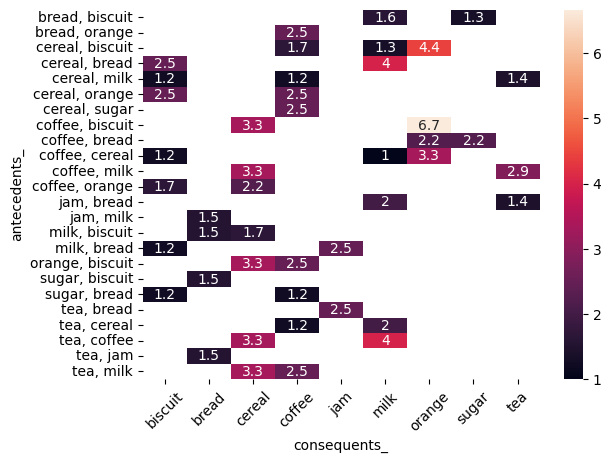

In [12]:
sns.heatmap(pivot, annot = True)
plt.xticks(rotation = 45)
plt.show()